<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Context_Grounded_QA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 — Overview / Features / Skills Demonstrated

# Gemini Context-Grounded Question Answering

## Overview
This notebook demonstrates a **multi-document, context-grounded question answering (QA) pipeline** using the Google Gemini API.  
Given a user query and a set of reference documents, the model provides **answers grounded strictly in the provided sources**, with explicit refusal if the answer is not present in the documents.

The notebook emphasizes **production-minded design**, including deterministic prompt construction, quota-safe simulation mode, optional live API execution, and structured pandas outputs for evaluation.

---

## Key Features
- Multi-document context ingestion for question answering
- Deterministic, rule-based prompt construction
- Quota-safe simulation mode
- Optional live Gemini API execution
- Structured evaluation using pandas DataFrames
- Step-by-step screenshots for portfolio presentation

---

## Skills Demonstrated
- Prompt engineering for evidence-grounded responses
- Rule-based control to prevent hallucinations
- Structured pipelines for multi-document reasoning
- Integration with pandas for evaluation and reproducibility
- Production-minded notebook design suitable for GitHub portfolios


# Step 2 — Sample Data

In [1]:
import pandas as pd

# Sample reference documents and queries
data = [
    {
        "query_id": 1,
        "query": "What were the main reasons for the recent NHS doctors' strike?",
        "documents": [
            "Thousands of NHS resident doctors in the UK began a five-day strike over pay erosion during a winter flu surge. Doctors claim that despite recent pay rises, their real-term earnings lag inflation.",
            "Training bottlenecks in the NHS have created career hurdles, increasing dissatisfaction among junior doctors. Public support has been mixed, with polling showing opposition to the strike."
        ],
        "expected_answer": (
            "The strike was primarily due to real-term pay erosion and career/training bottlenecks affecting NHS resident doctors."
        )
    },
    {
        "query_id": 2,
        "query": "Why were thousands of flights grounded recently worldwide?",
        "documents": [
            "A massive airline system outage grounded thousands of flights worldwide, highlighting software fragility in interconnected flight management systems.",
            "Governments have launched IT resilience investigations as travelers shared updates on social media."
        ],
        "expected_answer": (
            "The worldwide flight grounding was caused by a major airline system outage due to software fragility in flight management systems."
        )
    },
    {
        "query_id": 3,
        "query": "Summarize the impact of the new analytics features on user engagement.",
        "documents": [
            "The company completed its Q2 product launch, introducing new analytics features aimed at improving customer retention.",
            "Early feedback indicates increased user engagement, though infrastructure may need upgrades to support projected growth."
        ],
        "expected_answer": (
            "The new analytics features increased user engagement, with potential infrastructure requirements to support growth."
        )
    }
]

# Convert to DataFrame
df = pd.DataFrame(data)
df

,query_id,query,documents,expected_answer
0,1,What were the main reasons for the recent NHS ...,[Thousands of NHS resident doctors in the UK b...,The strike was primarily due to real-term pay ...
1,2,Why were thousands of flights grounded recentl...,[A massive airline system outage grounded thou...,The worldwide flight grounding was caused by a...
2,3,Summarize the impact of the new analytics feat...,"[The company completed its Q2 product launch, ...",The new analytics features increased user enga...


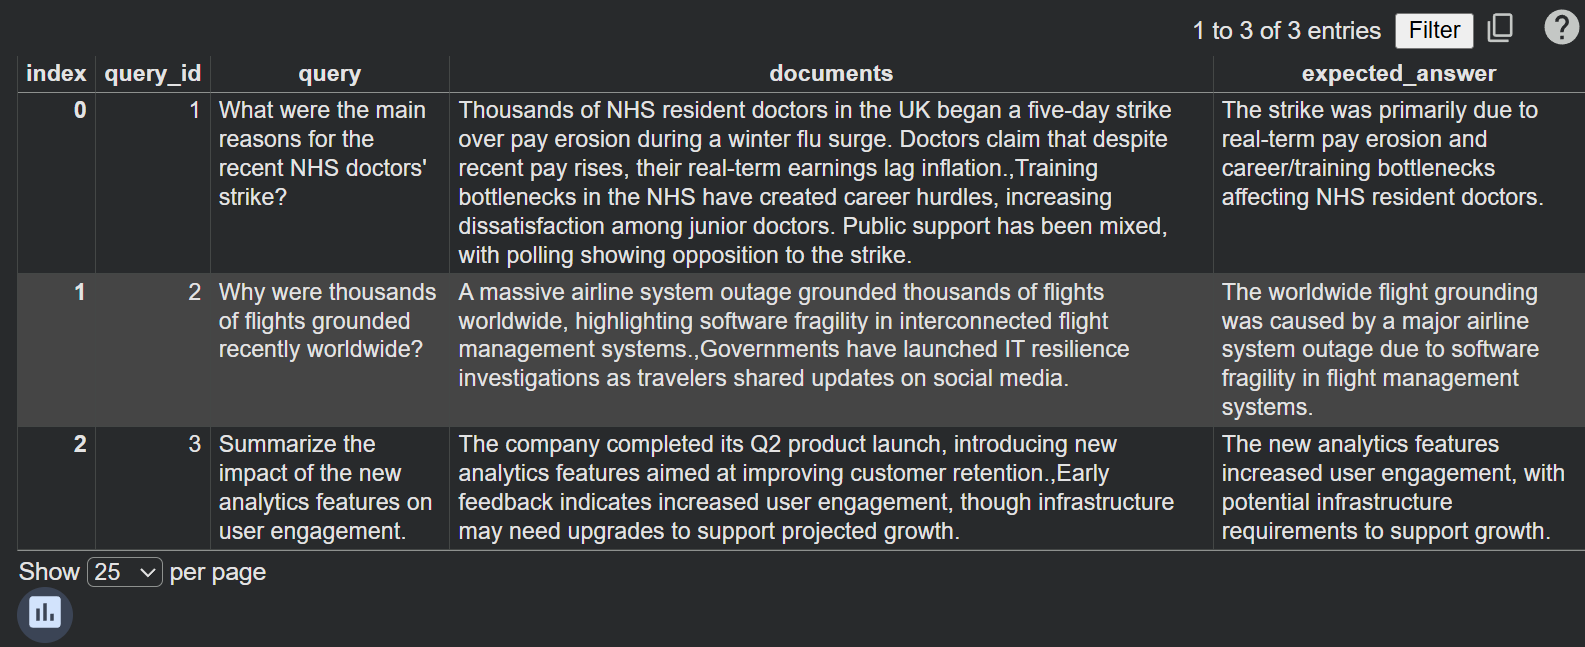

In [14]:
from IPython.display import Image, display

# Screenshot: Step 2 — Sample DataFrame
display(Image(filename="/content/screenshots/Step 2 - Sample DataFrame.png"))

# Step 3 — Prompt Construction

In [2]:
def build_qa_prompt(query: str, documents: list) -> str:
    """
    Construct a deterministic prompt for multi-document, evidence-grounded QA.
    """
    docs_text = "\n\n".join(documents)

    return f"""
You are an assistant performing context-grounded question answering.

Rules:
- Use ONLY the information provided in the source documents.
- Do NOT add external facts, assumptions, or commentary.
- If the answer is not present in the documents, reply: "Information not available in the provided sources."
- Provide concise, factual, and clear answers.

Query:
\"\"\"
{query}
\"\"\"

Documents:
\"\"\"
{docs_text}
\"\"\"

Provide a single, evidence-based answer to the query.
""".strip()

**Apply Prompt Construction to the Dataset**

In [3]:
df["prompt"] = df.apply(
    lambda row: build_qa_prompt(
        query=row["query"],
        documents=row["documents"]
    ),
    axis=1
)

df[["query_id", "query", "prompt"]]

,query_id,query,prompt
0,1,What were the main reasons for the recent NHS ...,You are an assistant performing context-ground...
1,2,Why were thousands of flights grounded recentl...,You are an assistant performing context-ground...
2,3,Summarize the impact of the new analytics feat...,You are an assistant performing context-ground...


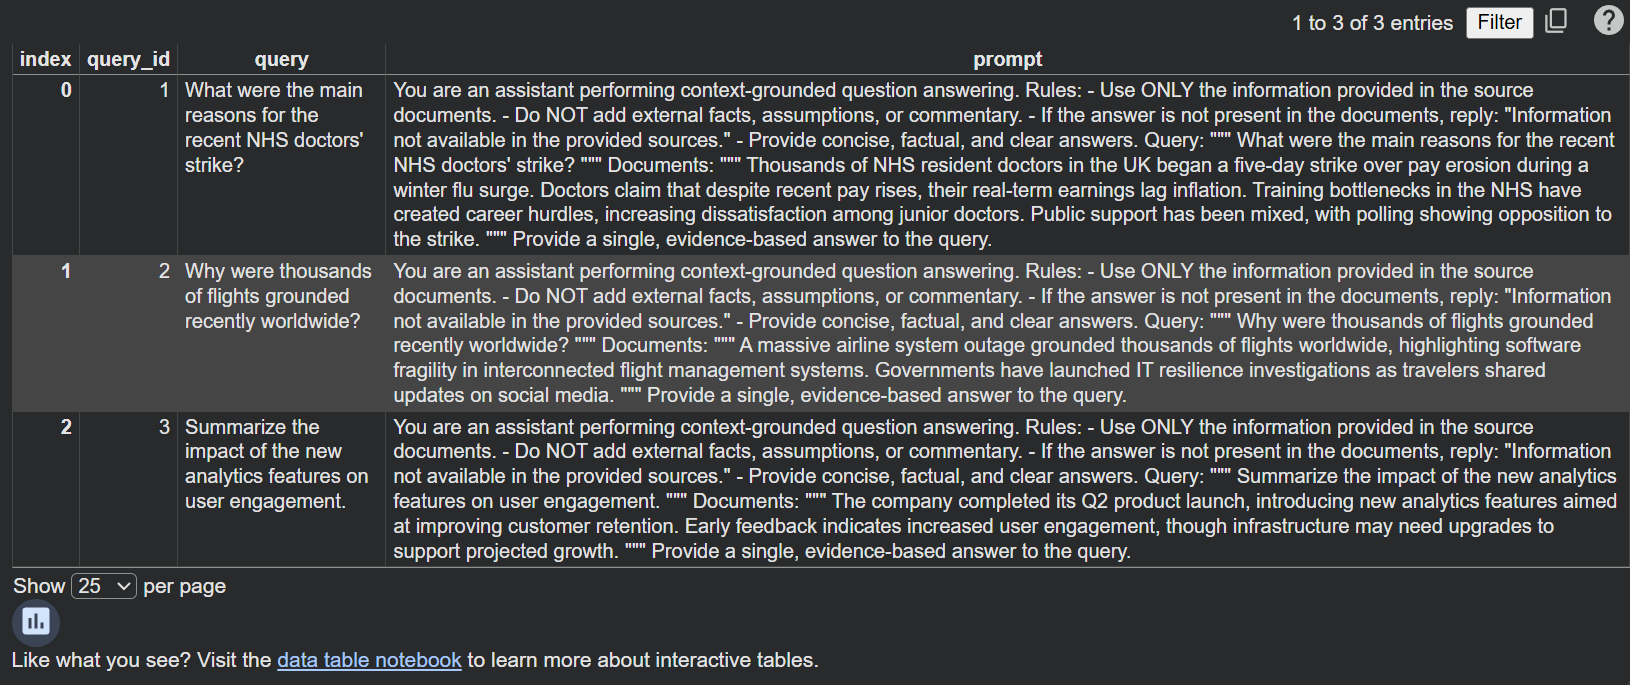

In [15]:
# Screenshot: Step 3 — Apply Prompt Construction
display(Image(filename="/content/screenshots/Step 3 - Apply Prompt Construction.png"))

# Step 4 — Simulation Mode Execution

In [4]:
def simulate_answer(query_id: int) -> str:
    """
    Deterministic placeholder answers for simulation mode.
    """
    simulated_answers = {
        1: "The strike was primarily due to real-term pay erosion and career/training bottlenecks affecting NHS resident doctors.",
        2: "The worldwide flight grounding was caused by a major airline system outage due to software fragility in flight management systems.",
        3: "The new analytics features increased user engagement, with potential infrastructure requirements to support growth."
    }
    return simulated_answers.get(query_id, "Information not available in the provided sources.")

**Apply Simulation Mode Across All Rows**

In [5]:
df["simulated_answer"] = df["query_id"].apply(simulate_answer)
df[["query_id", "query", "simulated_answer", "expected_answer"]]

,query_id,query,simulated_answer,expected_answer
0,1,What were the main reasons for the recent NHS ...,The strike was primarily due to real-term pay ...,The strike was primarily due to real-term pay ...
1,2,Why were thousands of flights grounded recentl...,The worldwide flight grounding was caused by a...,The worldwide flight grounding was caused by a...
2,3,Summarize the impact of the new analytics feat...,The new analytics features increased user enga...,The new analytics features increased user enga...


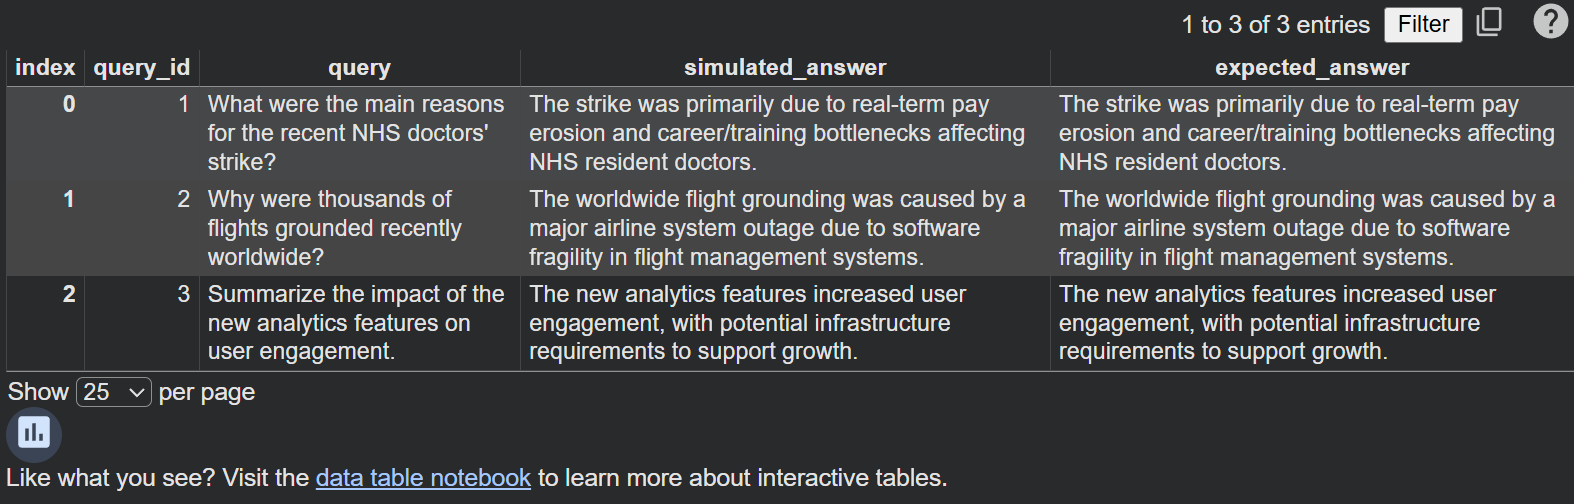

In [16]:
# Screenshot: Step 4 — Apply Simulation Mode
display(Image(filename="/content/screenshots/Step 4 - Apply Simulation Mode.png"))

# Step 5 — Optional Live Gemini API Mode

In [6]:
import google.generativeai as genai
import os

# Toggle live mode (off by default)
live_mode = False

# Configure Gemini only if live mode is enabled
if live_mode:
    genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
    model = genai.GenerativeModel("gemini-1.5-pro")

⚠️ Make sure your Gemini API key is set as an environment variable:
export GEMINI_API_KEY="your_key_here"

**Live QA Function**

In [7]:
def generate_live_answer(prompt: str) -> str:
    """
    Execute a live Gemini API call using a pre-built prompt.
    """
    response = model.generate_content(prompt)
    return response.text.strip()

**Apply Live Mode Safely Across Rows**

In [8]:
if live_mode:
    df["live_answer"] = df["prompt"].apply(generate_live_answer)
else:
    df["live_answer"] = None

df[["query_id", "query", "live_answer"]]

,query_id,query,live_answer
0,1,What were the main reasons for the recent NHS ...,None
1,2,Why were thousands of flights grounded recentl...,None
2,3,Summarize the impact of the new analytics feat...,None


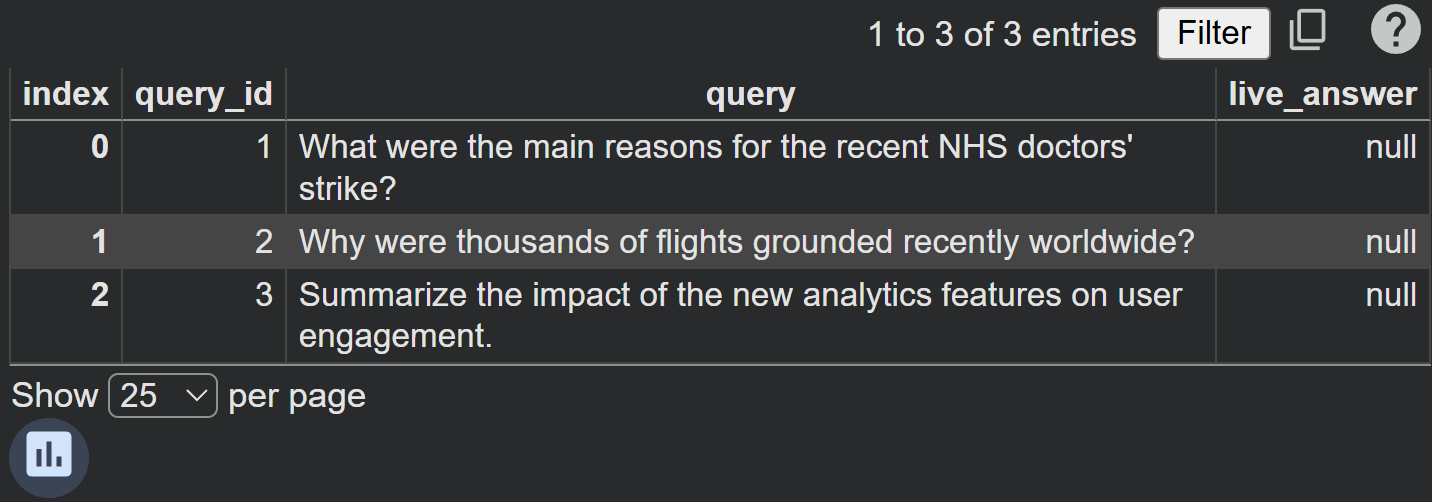

In [17]:
# Screenshot: tep 5 — Apply Live Mode
display(Image(filename="/content/screenshots/Step 5 - Apply Live Mode.png"))

# Step 6 — Evaluation Column

In [9]:
def evaluate_answer(answer: str, expected: str) -> str:
    """
    Simple qualitative evaluation comparing the model output to the expected answer.
    """
    if answer is None:
        return "Not evaluated (live mode disabled)"
    elif answer.strip() == expected.strip():
        return "✅ Matches expected answer"
    else:
        return "⚠️ Does not fully match expected answer"

**Apply Evaluation to the Dataset**

In [13]:
# Choose which column to evaluate
answer_column = "live_answer" if live_mode else "simulated_answer"

df["evaluation"] = df.apply(
    lambda row: evaluate_answer(row[answer_column], row["expected_answer"]),
    axis=1
)

df[["query_id", "query", answer_column, "expected_answer", "evaluation"]]

,query_id,query,simulated_answer,expected_answer,evaluation
0,1,What were the main reasons for the recent NHS ...,The strike was primarily due to real-term pay ...,The strike was primarily due to real-term pay ...,✅ Matches expected answer
1,2,Why were thousands of flights grounded recentl...,The worldwide flight grounding was caused by a...,The worldwide flight grounding was caused by a...,✅ Matches expected answer
2,3,Summarize the impact of the new analytics feat...,The new analytics features increased user enga...,The new analytics features increased user enga...,✅ Matches expected answer


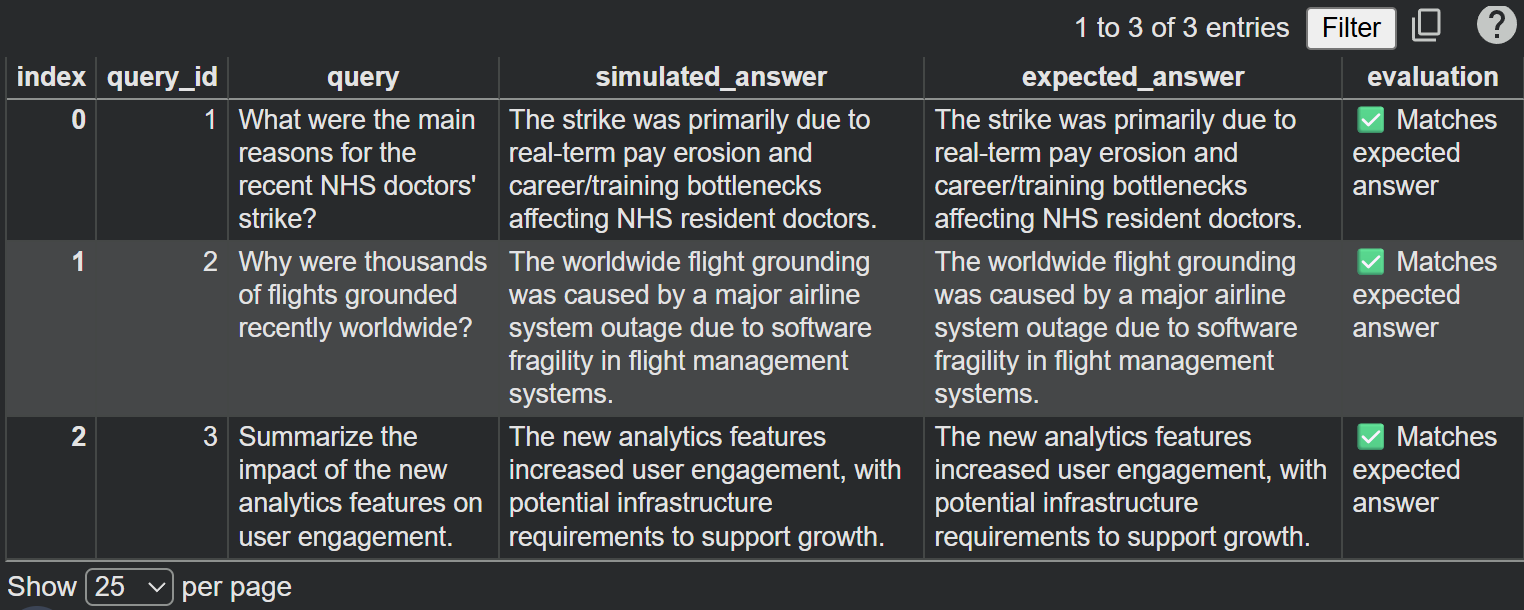

In [18]:
# Screenshot: Step 6 — Apply Evaluation
display(Image(filename="/content/screenshots/Step 6 - Apply Evaluation.png"))

## Summary & Key Takeaways

This notebook demonstrates **multi-document, context-grounded question answering** using the Google Gemini API.  
Each query is answered strictly based on the provided reference documents, with deterministic and reproducible outputs.

### Key Highlights
- Multi-document ingestion for evidence-based QA
- Deterministic prompt construction to prevent hallucinations
- Quota-safe simulation mode for testing without API usage
- Optional live Gemini API execution
- Structured evaluation comparing model output to expected answers
- Step-by-step screenshots for clarity and documentation

### Skills Demonstrated
- Prompt engineering for evidence-grounded responses
- Rule-based control to ensure outputs only use provided sources
- Structured multi-document reasoning pipelines using pandas
- Safe, reproducible LLM execution patterns
- Clear documentation and workflow design

### Next Steps / Usage
- Toggle `live_mode = True` to run live Gemini API queries  
- Add additional queries and reference documents for broader testing  
- Integrate this QA pipeline into research, reporting, or executive briefing workflows  

### Notes
- Simulation mode ensures **deterministic, quota-safe execution**  
- Evaluation column provides a **simple, reproducible measure of alignment** with expected answers  
- Fully **self-contained and reproducible**
